Практика 1 по Временным Рядам - Запорожченко

In [2]:
!pip install numpy
!pip install matplotlib
!pip install sounddevice
!pip install scipy

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd

Задание 1

Сгенерите розовый шум путем первой генерации сигнала белого шума, преобразования его Фурье, затем деления амплитуд различных частотных составляющих на квадратный корень из частоты
Вам понадобятся функции np.fft.rfft , np.real , np.sqrt

[-0.4812378  -0.04646036  0.20145201 ... -1.43007914 -2.07752584
 -0.03173966]


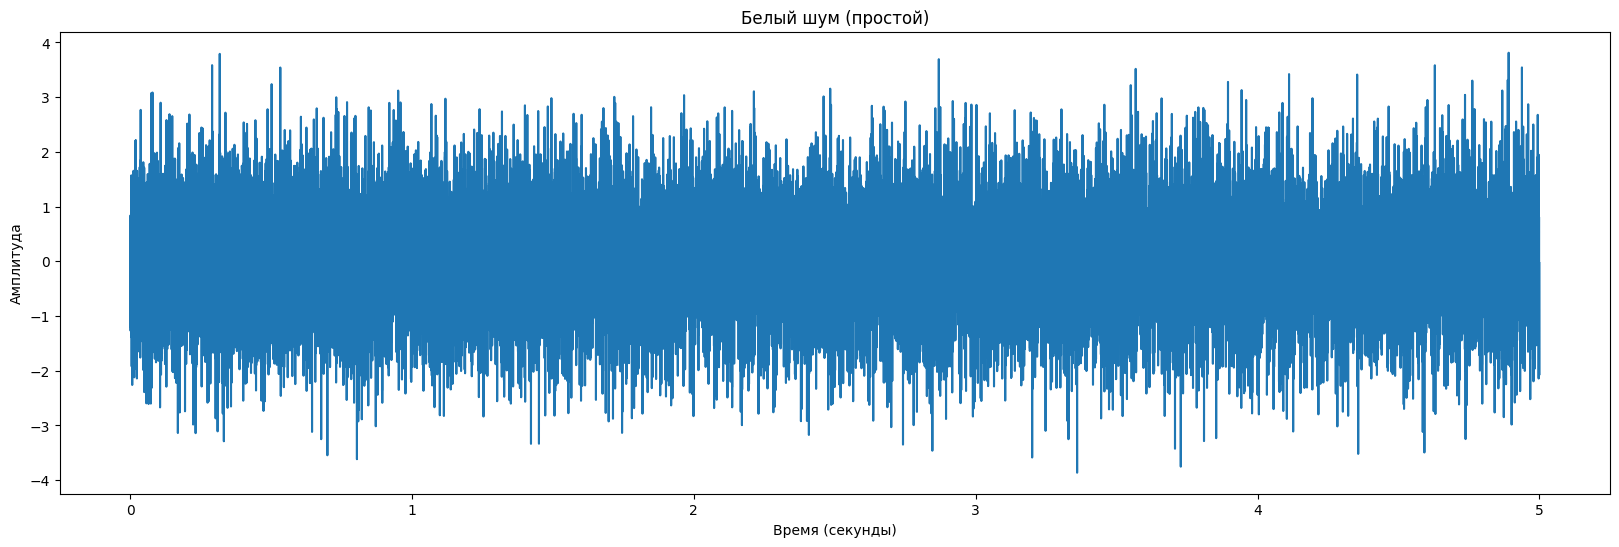

In [4]:
# генерим белый шум
duration = 5  # Продолжительность в секундах
sample_rate = 4100  # Частота дискретизации в Гц
num_samples = int(duration * sample_rate) #Количество элементов для генерации

#white_noise_gauss = np.random.random(num_samples) # генерируем белый шум

white_noise_gauss = np.random.normal(loc = 0, scale = 1, size = num_samples) # генерируем гауссовский белый шум

print(white_noise_gauss)

# создаем временную шкалу. Считаем, что она начинается с 0, до окончания записи (duretion).
# Между этими значениями равномерно заполняем ряд time_axis, чтобы в нем оказалось ровно столько элементов, сколько во временном ряду
time_axis = np.linspace(0, duration, len(white_noise_gauss))

# заданем параметры полотна, на котором будем рисовать
plt.figure(figsize=(20, 6))

# определяем, что будем отрисовывать. По x - time_axis, по y - white_noise_gauss
plt.plot(time_axis, white_noise_gauss)

# заголовки
plt.title('Белый шум (простой)')
plt.xlabel('Время (секунды)')
plt.ylabel('Амплитуда')

# команда на отрисовку
plt.show()

In [5]:
# слушаем, что получилось
sd.play(white_noise_gauss, sample_rate)
sd.wait()

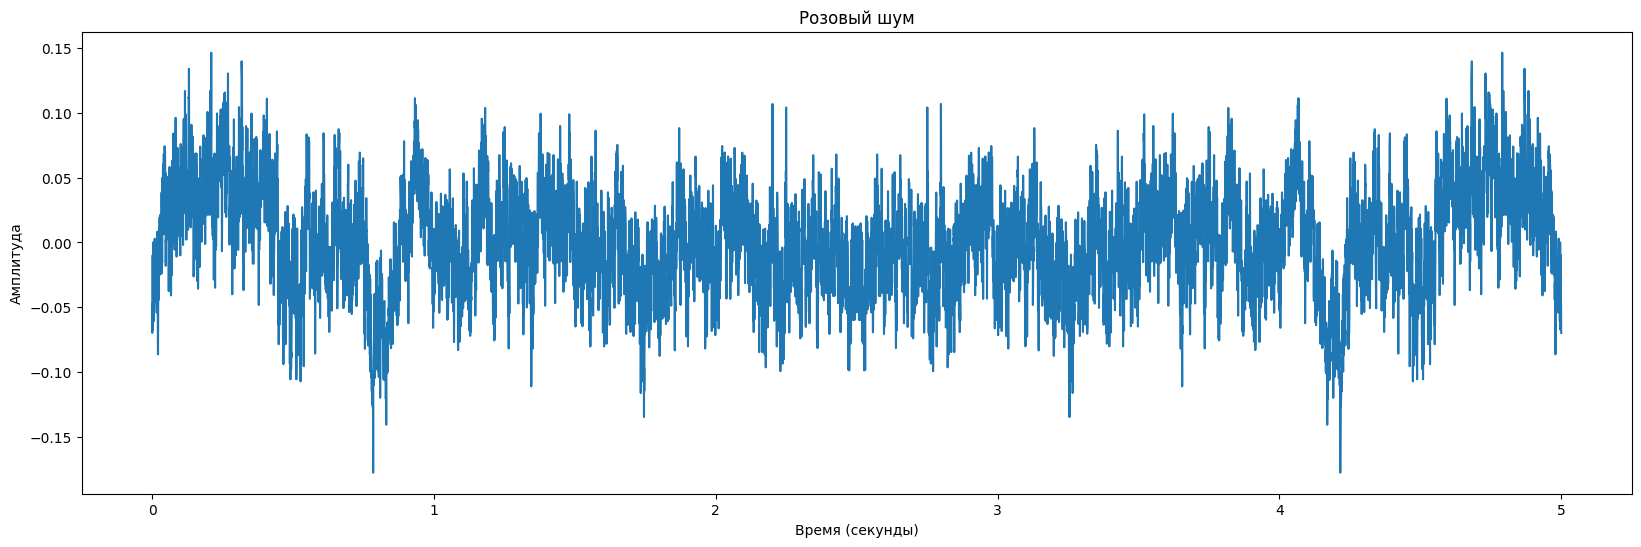

In [6]:
#генерируем розовый шум

#с помощью Фурье преобразуем в частотный домен
furie = np.fft.rfft(white_noise_gauss)

#извлекаем вещественную часть
furie = np.real(furie)

#массив последовательных чисел от 1 до длины спектра
numbers_array = np.arange(1, len(furie) + 1)

#деление амплитуд различных частотных составляющих на квадратный корень из частоты
furie = furie / np.sqrt(numbers_array)

#обратное преобразование Фурье - возвращаем во временной домен
pink_noise = np.fft.irfft(furie, len(furie))

#рисуем результат
time_axis = np.linspace(0, duration, len(pink_noise))
plt.figure(figsize=(20, 6))
plt.plot(time_axis, pink_noise)

# заголовки
plt.title('Розовый шум')
plt.xlabel('Время (секунды)')
plt.ylabel('Амплитуда')

# команда на отрисовку
plt.show()

In [7]:
# слушаем, что получилось
sd.play(pink_noise, sample_rate)
sd.wait()

Задание 2
Черный шум как шум абсолютно черного тела при темературе 17 нанокельвинов

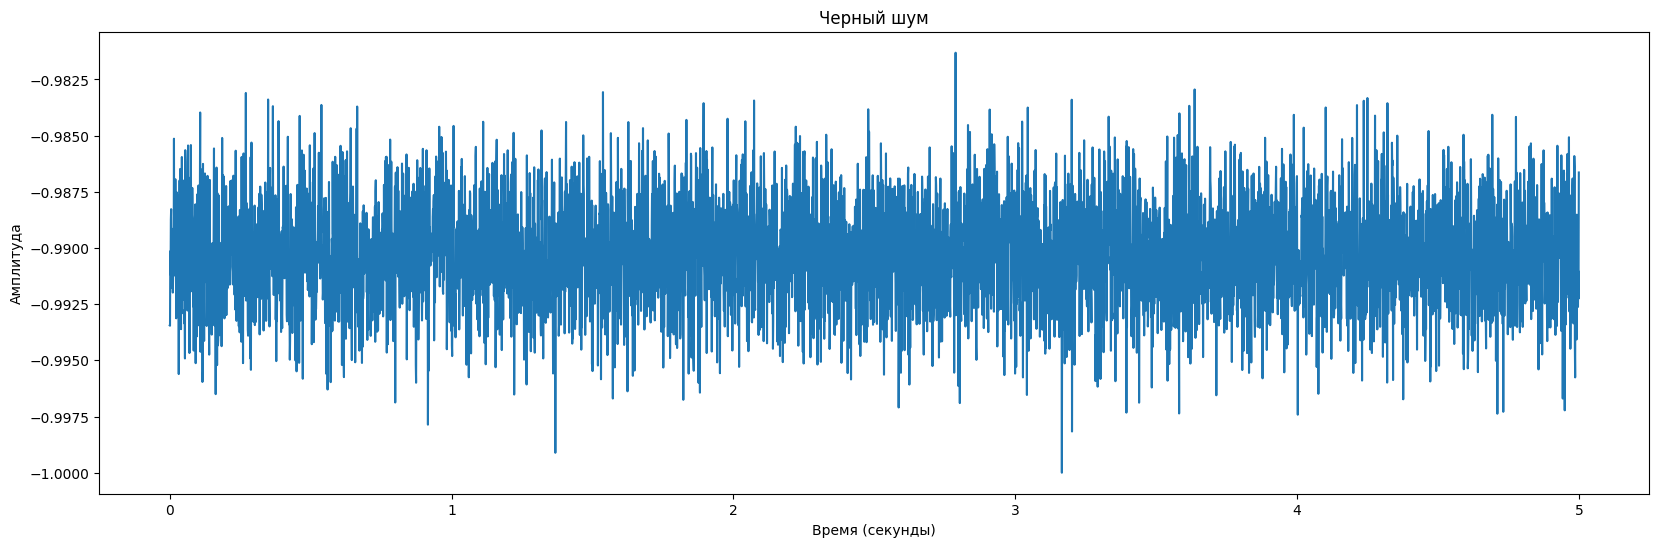

In [8]:
import scipy.constants

#константы
kb =  scipy.constants.k
h = scipy.constants.physical_constants['Planck constant'][0]
c = scipy.constants.c

num_sample = duration * sample_rate;

T = 17*1/np.power(10, 9)  #Температура 17 нанокельвинов
G = 10

coef1 = 2*h/(c*c*T*T*T)
coef2 = h/(kb*T)

#Для 17 нанокельвинов полоса пропускания шума будет от 1Гц до 12 кГц
freq1 = 1000

num_samples = int(duration * freq1)
black_noise = np.zeros(num_samples)   # подготовили лист для записи сигнала
time_axis = np.arange(num_samples) / sample_rate   # задали временную ось


black_noise = np.zeros(num_samples)
time_axis = np.arange(num_samples) / sample_rate
eq = 10 * np.log(coef1*np.power(freq1,3)/(np.exp(coef2*freq1)-1)) + 10 # эквалайзер

white_noise_g = np.random.normal(loc = 0, scale = 1, size = num_samples) # опять белый шум

black_noise = white_noise_g + eq # применяем преобразование к белому шуму

black_noise /= np.max(np.abs(black_noise))  # Нормализация амплитуды к [-1, 1]

# Визуализация
time_axis = np.linspace(0, duration, len(black_noise))
plt.figure(figsize=(20, 6))
plt.plot(time_axis, black_noise)
plt.title('Черный шум')
plt.xlabel('Время (секунды)')
plt.ylabel('Амплитуда')
plt.show()



In [9]:
# так звучит черное тело
sd.play(black_noise, freq1)
sd.wait()

Задание 3 - Зашумленный сигнал по любой фукнции, которая нравится

Text(0, 0.5, 'Амплитуда')

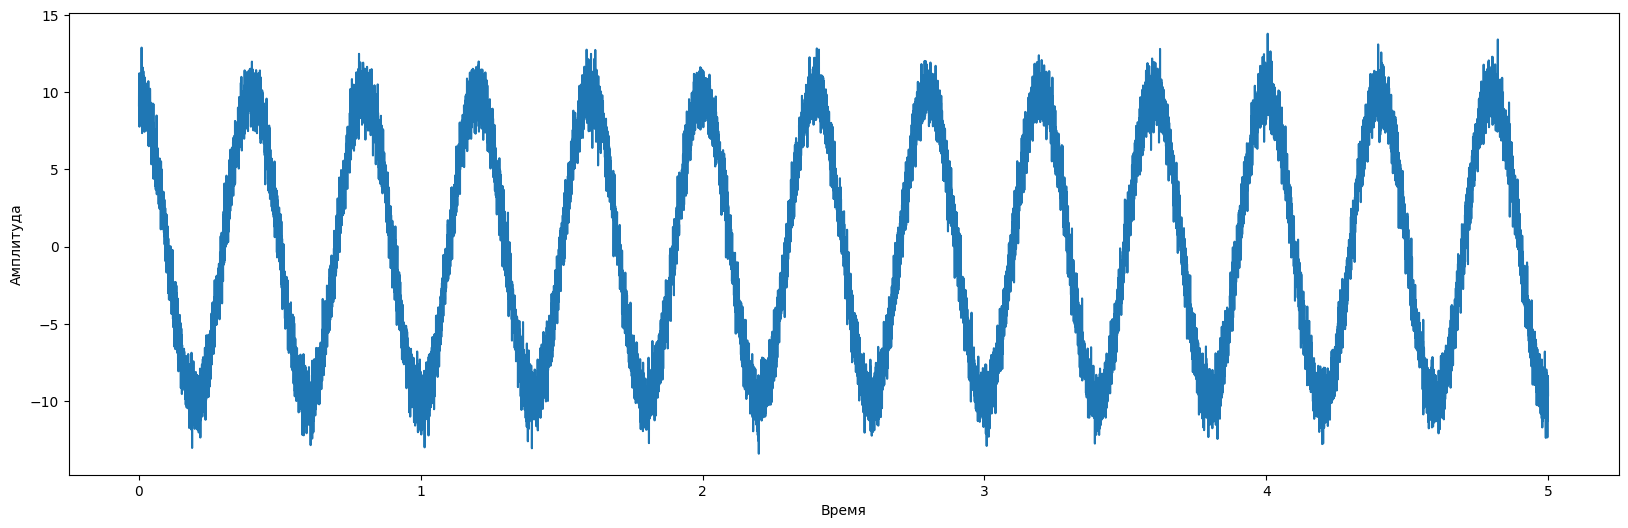

In [10]:
duration = 5  # Продолжительность в секундах
sample_rate = 4100  # Частота дискретизации в Гц
num_points = duration*sample_rate  # количество точек


# Визуализация
time_points = np.linspace(0, duration, num_points)  # Создаем равномерные временные точки от 0 до 5 секунд
white_noise_base = np.random.normal(0,1,size=num_points)  # Генерим белый шум
values = 10*np.cos(5*time_points*np.pi) # вычисляем амплитуды незашумленный сигнала
values_noise = values + white_noise_base # зашумляем сигнал
time_axis = np.linspace(0, duration, len(black_noise))

plt.figure(figsize=(20, 6))
plt.plot(time_points, values_noise)
plt.xlabel('Время')
plt.ylabel('Амплитуда')